### 1. Machine Learning Models

#### Importing essential libraries

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')

#### Spliting CIFAR10 dataset into training and test dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
accuracy_list = []

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


#### Plotting first 25 images of CIFAR10

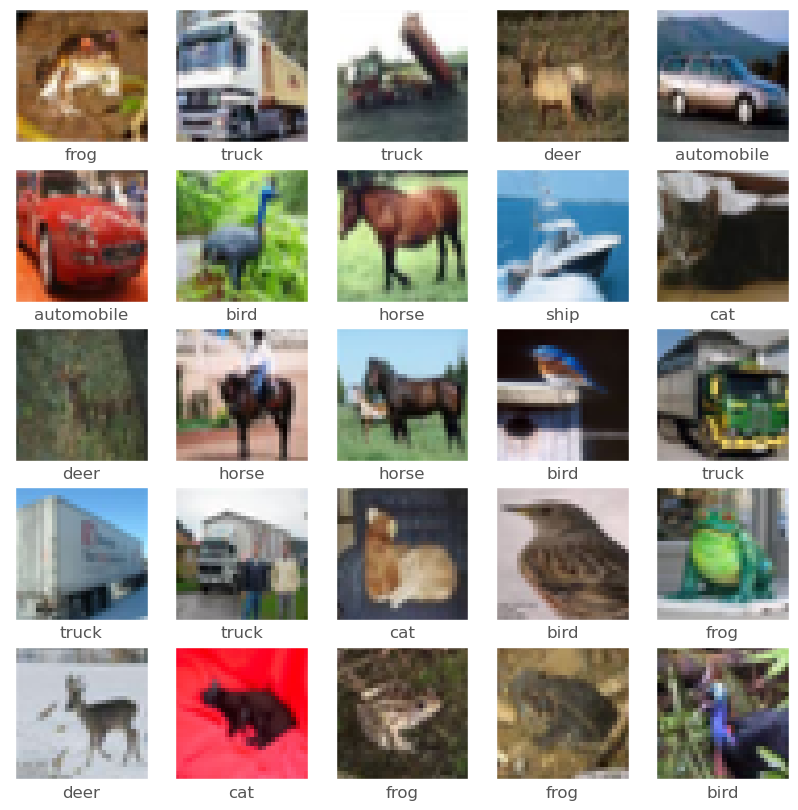

In [85]:
classes = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i][0]])
plt.show()

def create_dataframe(labels, metrics):
    data = {'Metric': labels, 'Values': metrics}
    df = pd.DataFrame(data)
    return df

# Metric labels
m_labels = ['Accuracy', 'Precision', 'Recall', 'F1_score', 'MSE']

#### Normalization of dataset

In [5]:
# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#### Data Augmentation and Dimensionality Reduction using PCA

In [6]:
# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True                         
)

# Fit the generator to the training data
datagen.fit(x_train)

# Generate augmented data
augment_size = 2000  # Adjust based on computational power
x_train_augmented = np.zeros((augment_size, 32, 32, 3))
y_train_augmented = np.zeros((augment_size, 1))

i = 0
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=augment_size, shuffle=False):
    x_train_augmented[i:i + augment_size] = x_batch
    y_train_augmented[i:i + augment_size] = y_batch
    i += augment_size
    if i >= augment_size:
        break

# Flatten the images
x_train_augmented = x_train_augmented.reshape(x_train_augmented.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)  # Reducing to 50 principal components
x_train_pca = pca.fit_transform(x_train_augmented)
x_test_pca = pca.transform(x_test)

####  K-Nearest Neighbors

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, algorithm='auto')

# Train the classifier
knn_classifier.fit(x_train_pca, y_train_augmented.flatten())

KNeighborsClassifier()

#### Calculating metrics for the evaluation of model

In [8]:
# predict on the test set
y_pred = knn_classifier.predict(x_test_pca)

# Calculate accuracy, precision, recall and f1 score
metrics = []

knn_accuracy = accuracy_score(y_test, y_pred) * 100
metrics.append(knn_accuracy)
precision = precision_score(y_test, y_pred, average='macro') * 100
metrics.append(precision)
recall = recall_score(y_test, y_pred, average='macro') * 100
metrics.append(recall)
f1 = f1_score(y_test, y_pred, average='macro') * 100
metrics.append(f1)
MSE = mean_squared_error(y_test, y_pred)
metrics.append(MSE)
df = create_dataframe(m_labels, metrics)
print(df)
accuracy_list.append(knn_accuracy)

      Metric     Values
0   Accuracy  26.090000
1  Precision  30.990371
2     Recall  26.090000
3   F1_score  24.296547
4        MSE  13.890200


#### Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Calssifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(x_train_pca, y_train_augmented.flatten())

RandomForestClassifier(random_state=42)

In [10]:
# predict on the test set
y_pred = rf_classifier.predict(x_test_pca)

# Calculate accuracy, precision, recall and f1 score
metrics = []

rf_accuracy = accuracy_score(y_test, y_pred) * 100
metrics.append(rf_accuracy)
precision = precision_score(y_test, y_pred, average='macro') * 100
metrics.append(precision)
recall = recall_score(y_test, y_pred, average='macro') * 100
metrics.append(recall)
f1 = f1_score(y_test, y_pred, average='macro') * 100
metrics.append(f1)
MSE = mean_squared_error(y_test, y_pred)
metrics.append(MSE)
df = create_dataframe(m_labels, metrics)
print(df)
accuracy_list.append(rf_accuracy)

      Metric     Values
0   Accuracy  34.670000
1  Precision  34.124152
2     Recall  34.670000
3   F1_score  34.029940
4        MSE  12.123700


#### Support Vector Machine

In [11]:
# Train a linear SVM
svm_model = SVC(kernel='linear')

# Train the SVM model
svm_model.fit(x_train_pca, y_train_augmented.flatten())

SVC(kernel='linear')

In [12]:
# Predict on the test set
y_pred = svm_model.predict(x_test_pca)

# Calculate accuracy, precision, recall and f1 score
metrics = []

svm_accuracy = accuracy_score(y_test, y_pred) * 100
metrics.append(svm_accuracy)
precision = precision_score(y_test, y_pred, average='macro') * 100
metrics.append(precision)
recall = recall_score(y_test, y_pred, average='macro') * 100
metrics.append(recall)
f1 = f1_score(y_test, y_pred, average='macro') * 100
metrics.append(f1)
MSE = mean_squared_error(y_test, y_pred)
metrics.append(MSE)
df = create_dataframe(m_labels, metrics)
print(df)
accuracy_list.append(svm_accuracy)

      Metric     Values
0   Accuracy  32.450000
1  Precision  32.424266
2     Recall  32.450000
3   F1_score  32.323902
4        MSE  12.901600


#### Performance Visualization

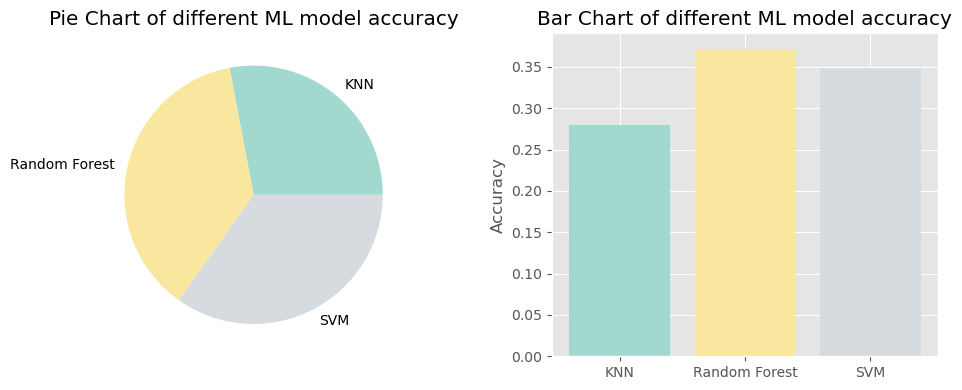

In [13]:
accuracy_list = accuracy_list / sum(accuracy_list)
mylabels = ["KNN", "Random Forest", "SVM"]
mycolors = ["#A2D9CE", "#F9E79F", "#D6DBDF"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.pie(accuracy_list, labels = mylabels, colors=mycolors)
ax1.set_title("Pie Chart of different ML model accuracy")

ax2.bar(mylabels, accuracy_list, color=mycolors)
ax2.set_ylabel('Accuracy')
ax2.set_title('Bar Chart of different ML model accuracy')
plt.tight_layout()
plt.show()

### 2. Neural Networks

#### Import Neccesary libraries for implementation of Neural Networks

In [15]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.metrics import Accuracy, Precision, Recall, MeanSquaredError
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [16]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#### Performance Visualization
##### Below cell is implemention of different metric and curve which are visualized

In [21]:
# Accuracy and Loss curve
def plot_accuracy_and_loss(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# ROC curve and AUC
def plot_roc_curve(y_true, y_pred_proba, classes):
    plt.figure(figsize=(12, 4))
    for i in range(len(classes)):
        fpr, tpr, _ = roc_curve(y_true == i, y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {classes[i]} (area = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Receiver Operating Characteristic")
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.show()

# Precision-Recall curve
def plot_precision_recall_curve(y_true, y_pred_proba, classes):
    plt.figure(figsize=(10,4))
    for i in range(len(classes)):
        precision, recall, _ = precision_recall_curve(y_true == i, y_pred_proba[:, i])
        plt.plot(recall, precision, label=f"Class {classes[i]}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend(loc="best")
    plt.show()

#### Feedforward Neural Network

##### Building the architecture of FF neural network

In [17]:
# Build the model
ff_model = Sequential()
# Flatten the input
ff_model.add(Flatten(input_shape=(32, 32, 3)))
ff_model.add(Dense(512, activation='relu'))
ff_model.add(Dropout(0.5))
ff_model.add(Dense(512, activation='relu'))
ff_model.add(Dropout(0.5))
ff_model.add(Dense(512, activation='relu'))
ff_model.add(Dropout(0.5))

# Output layer
ff_model.add(Dense(10, activation='softmax'))

##### Compilation of the model

In [18]:
# Compile the model
ff_model.compile(optimizer=Adam(),
                 loss="sparse_categorical_crossentropy",
                 metrics = ["accuracy"]
                )

##### Model Summary

In [18]:
print(ff_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0

##### Training the Model

In [19]:
# Train the model
ff_history = ff_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), verbose=2)

Epoch 1/10
782/782 - 10s - loss: 2.1800 - accuracy: 0.1575 - val_loss: 2.0793 - val_accuracy: 0.1983
Epoch 2/10
782/782 - 10s - loss: 2.1060 - accuracy: 0.1833 - val_loss: 2.0693 - val_accuracy: 0.2287
Epoch 3/10
782/782 - 10s - loss: 2.0736 - accuracy: 0.2007 - val_loss: 1.9956 - val_accuracy: 0.2644
Epoch 4/10
782/782 - 9s - loss: 2.0658 - accuracy: 0.2039 - val_loss: 2.0272 - val_accuracy: 0.2224
Epoch 5/10
782/782 - 9s - loss: 2.0563 - accuracy: 0.2075 - val_loss: 1.9743 - val_accuracy: 0.2680
Epoch 6/10
782/782 - 9s - loss: 2.0531 - accuracy: 0.2094 - val_loss: 2.0419 - val_accuracy: 0.2453
Epoch 7/10
782/782 - 9s - loss: 2.0491 - accuracy: 0.2101 - val_loss: 1.9903 - val_accuracy: 0.2516
Epoch 8/10
782/782 - 9s - loss: 2.0389 - accuracy: 0.2164 - val_loss: 2.0100 - val_accuracy: 0.2574
Epoch 9/10
782/782 - 9s - loss: 2.0386 - accuracy: 0.2169 - val_loss: 2.0603 - val_accuracy: 0.2277
Epoch 10/10
782/782 - 9s - loss: 2.0412 - accuracy: 0.2183 - val_loss: 2.0239 - val_accuracy: 0.2

##### Evalution of the model

In [20]:
# Evaluate the model
test_loss, test_acc = ff_model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100: .2f}%")

# predict on the test set
y_pred = np.argmax(ff_model.predict(x_test), axis=1)
# Calculate other metrics
precision = precision_score(y_test, y_pred, average='macro', zero_division=0.0)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1_Score: {f1 * 100:.2f}%")

313/313 - 1s - loss: 2.0239 - accuracy: 0.2550
Test Accuracy:  25.50%
Precision: 31.20%
Recall: 25.50%
F1_Score: 23.90%


##### Plotting the accracy and loss curve of the model

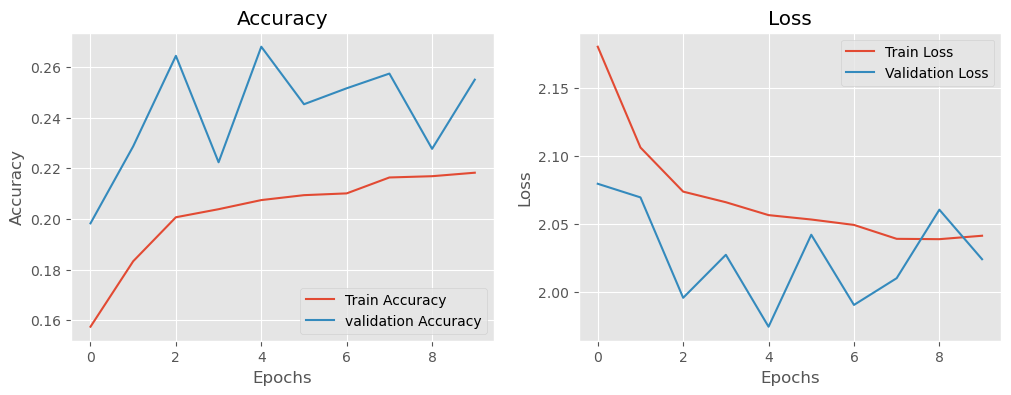

In [22]:
plot_accuracy_and_loss(ff_history)

##### Confusion Matrix of the model

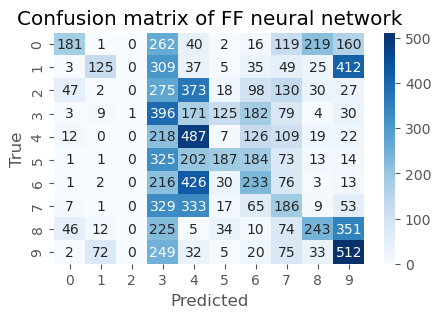

In [23]:
plot_confusion_matrix(y_test, y_pred, "Confusion matrix of FF neural network")

##### ROC curve and AUC

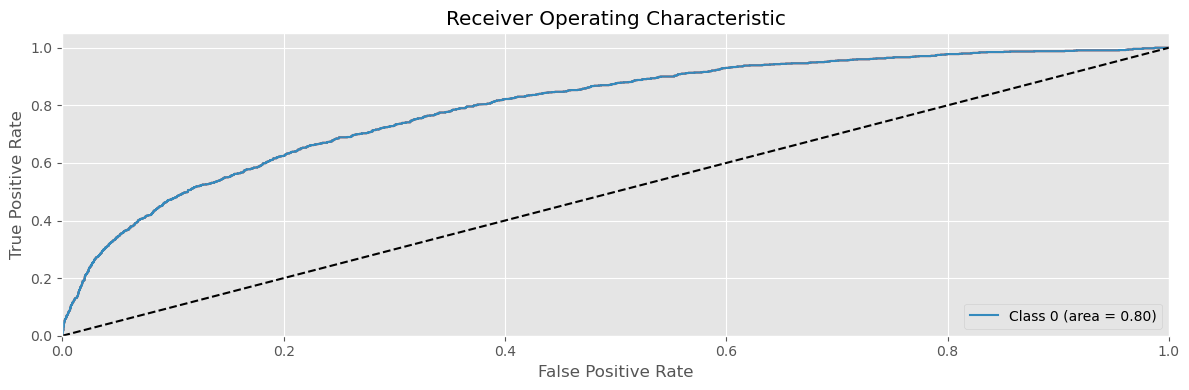

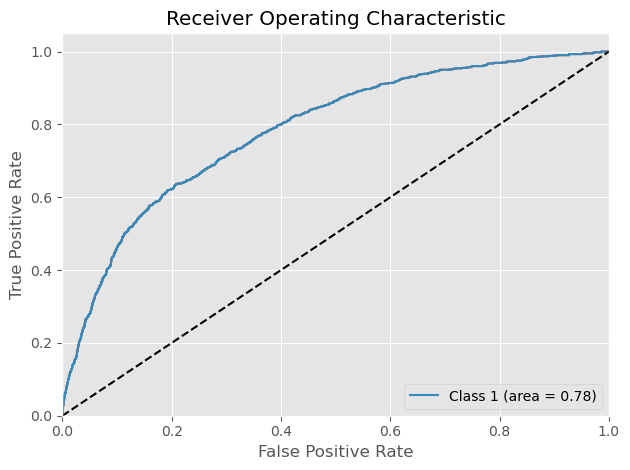

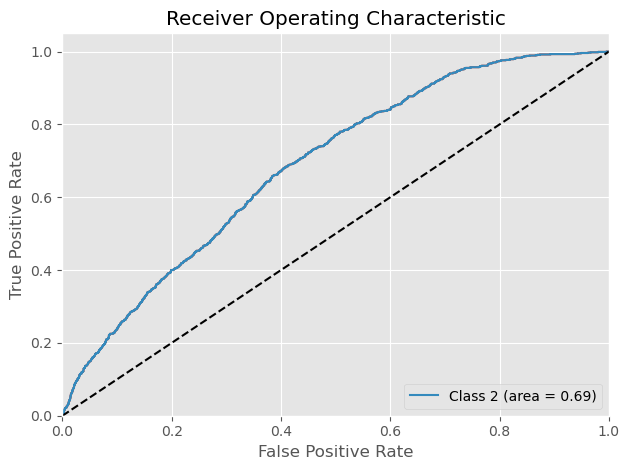

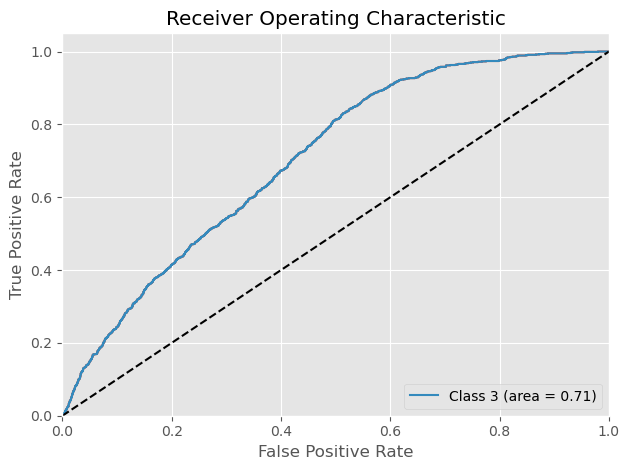

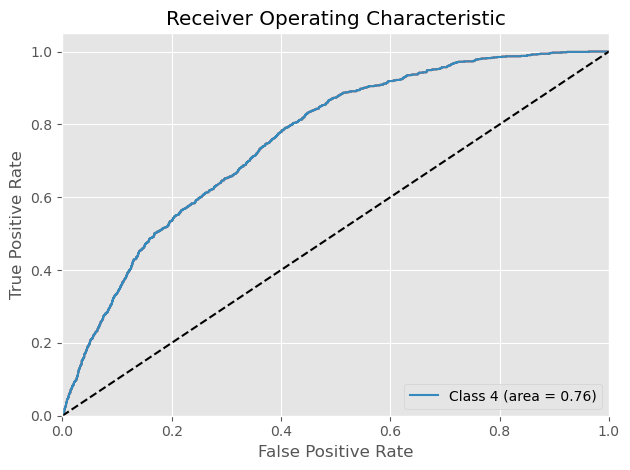

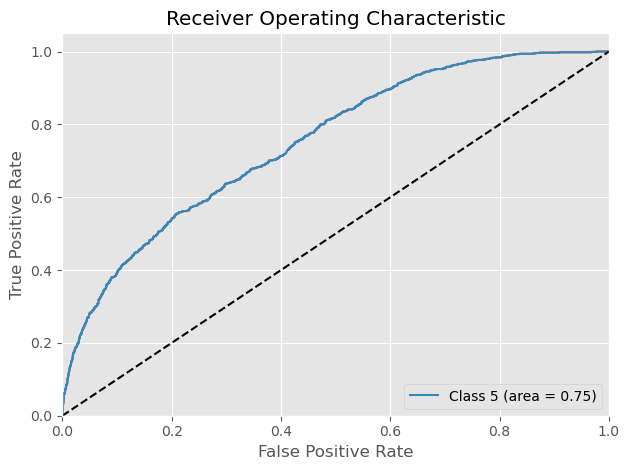

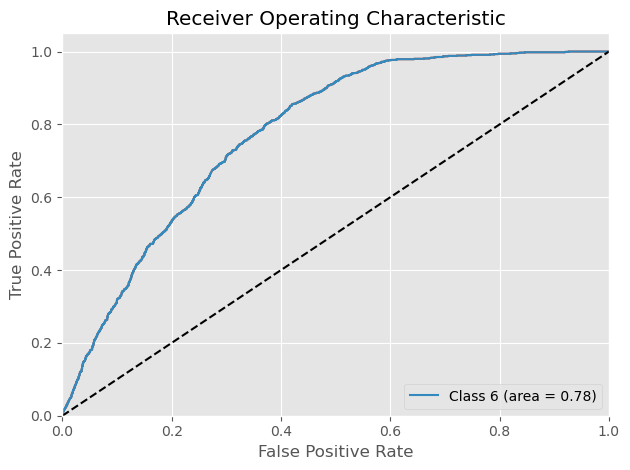

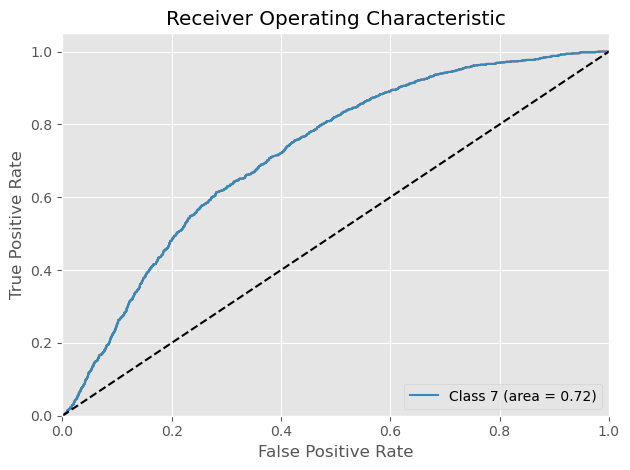

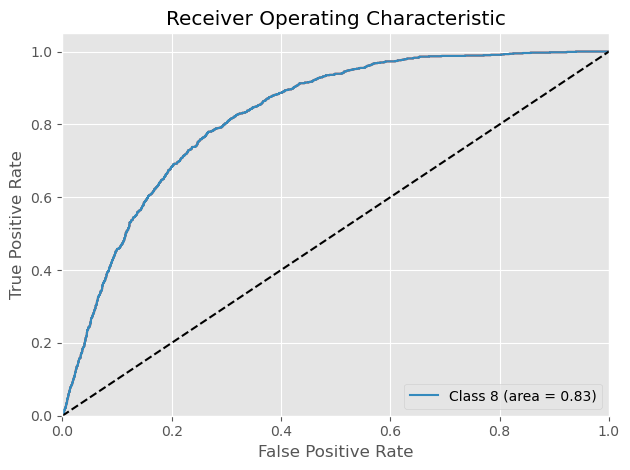

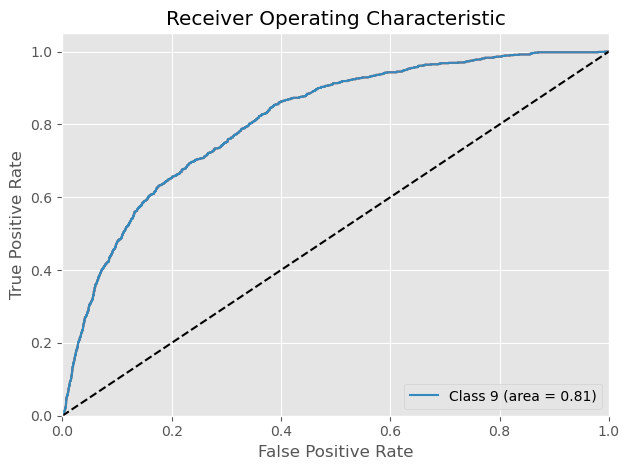

In [24]:
y_pred_proba = tf.nn.softmax(ff_model.predict(x_test)).numpy()
plot_roc_curve(y_test, y_pred_proba, classes=range(10))

##### Plotting the Precision-Recall curve

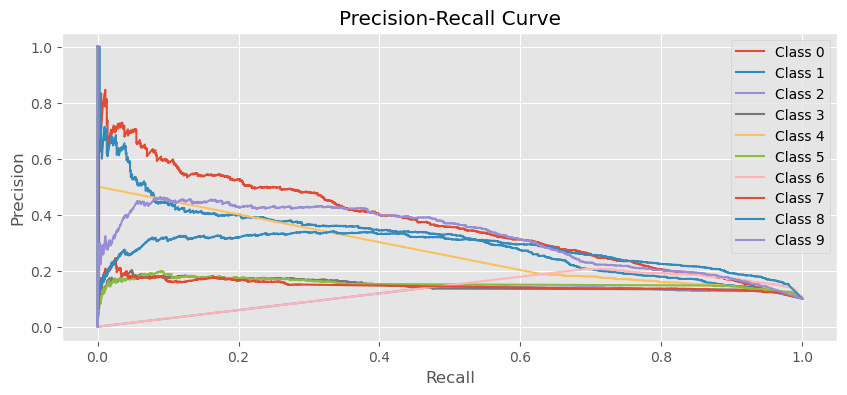

In [41]:
plot_precision_recall_curve(y_test, y_pred_proba, classes=range(10))

#### Convolutional Neural Network
##### In this section we build, train and evaluate multiple CNN with various parameter like number and configuration of layers,
##### loss function, metric, optimizer and different values for hyperparameters.

In [25]:
# Build the model
model_1 = Sequential()
model_1.add(Conv2D(filters=32, kernel_size=(3, 3), activation="tanh", input_shape=(32, 32, 3)))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(filters=64, kernel_size=(4, 4), activation="tanh"))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Flatten())
model_1.add(Dense(units=34, activation="tanh"))
model_1.add(Dense(units=10, activation="softmax"))

In [37]:
# Compile model
model_1.compile(
    optimizer=SGD(),
    loss="sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [38]:
# Train the model
history_1 = model_1.fit(x_train, y_train, batch_size=64, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
782/782 [==============================] - 21s 27ms/step - loss: 0.5644 - accuracy: 0.8119 - val_loss: 0.9928 - val_accuracy: 0.6750
Epoch 2/10
782/782 [==============================] - 24s 31ms/step - loss: 0.5258 - accuracy: 0.8259 - val_loss: 1.0028 - val_accuracy: 0.6750
Epoch 3/10
782/782 [==============================] - 26s 34ms/step - loss: 0.5086 - accuracy: 0.8317 - val_loss: 1.0018 - val_accuracy: 0.6765
Epoch 4/10
782/782 [==============================] - 22s 28ms/step - loss: 0.4956 - accuracy: 0.8373 - val_loss: 1.0325 - val_accuracy: 0.6674
Epoch 5/10
782/782 [==============================] - 21s 27ms/step - loss: 0.4861 - accuracy: 0.8411 - val_loss: 1.1373 - val_accuracy: 0.6441
Epoch 6/10
782/782 [==============================] - 21s 27ms/step - loss: 0.4779 - accuracy: 0.8429 - val_loss: 1.0183 - val_accuracy: 0.6752
Epoch 7/10
782/782 [==============================] - 21s 27ms/step - loss: 0.4703 - accuracy: 0.8457 - val_loss: 1.1242 - val_accuracy:

In [39]:
# Evaluate the model
test_loss, test_acc = model_1.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100: .2f}%")

# predict on the test set
y_pred = np.argmax(model_1.predict(x_test), axis=1)

# Calculate other metrics
precision = precision_score(y_test, y_pred, average='macro',zero_division=0.0)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1_Score: {f1 * 100:.2f}%")

313/313 - 2s - loss: 1.0672 - accuracy: 0.6702
Test Accuracy:  67.02%
Precision: 67.88%
Recall: 67.02%
F1_Score: 67.14%


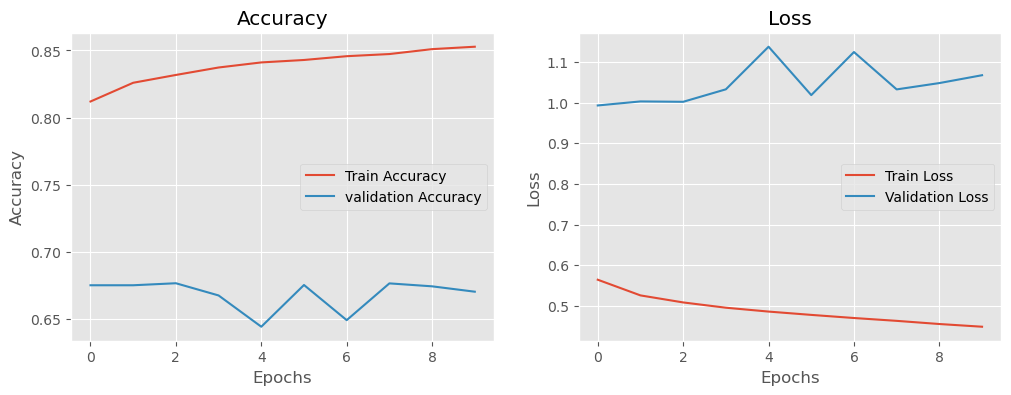

In [40]:
plot_accuracy_and_loss(history_1)

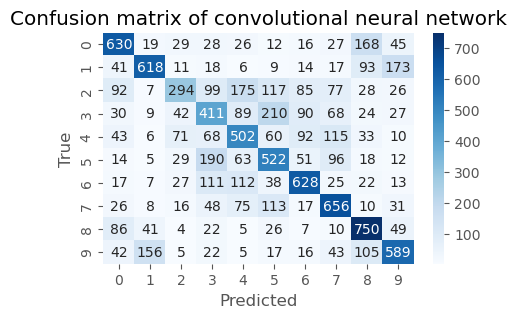

In [56]:
plot_confusion_matrix(y_test, y_pred, "Confusion matrix of convolutional neural network")

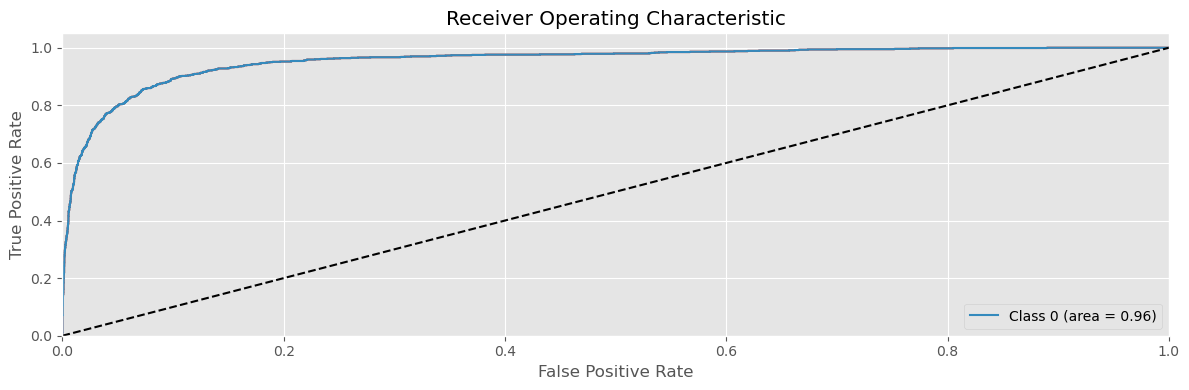

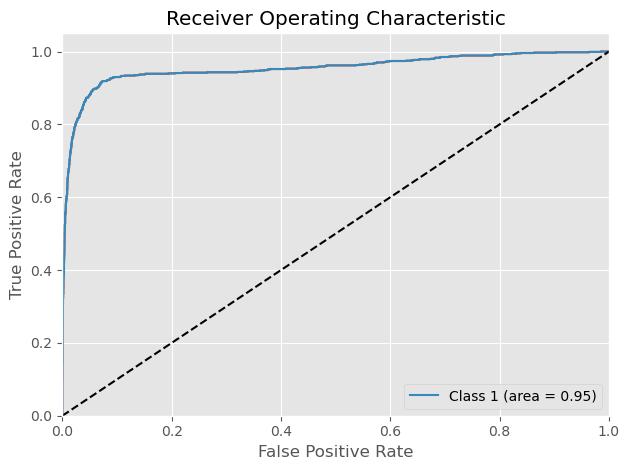

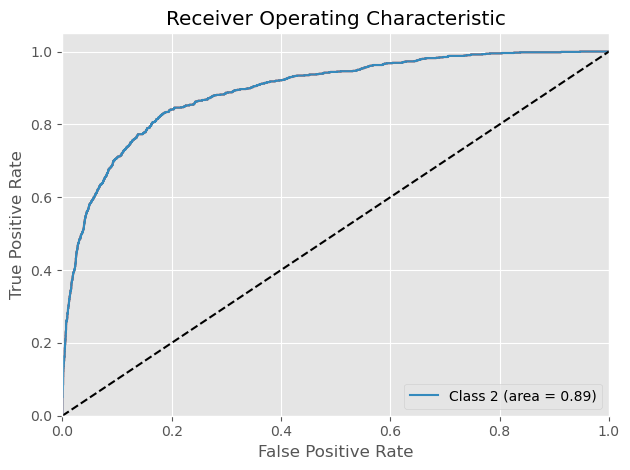

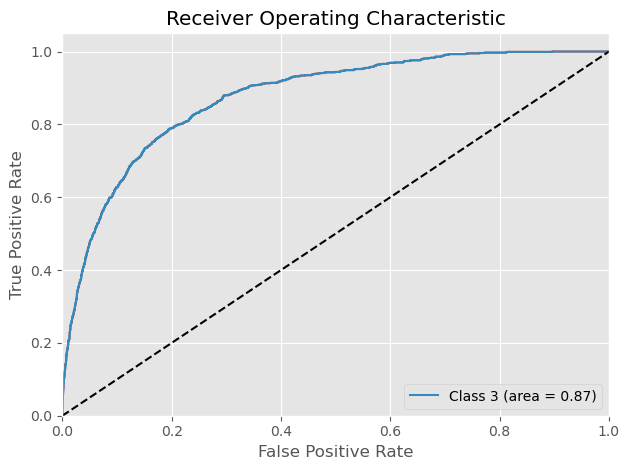

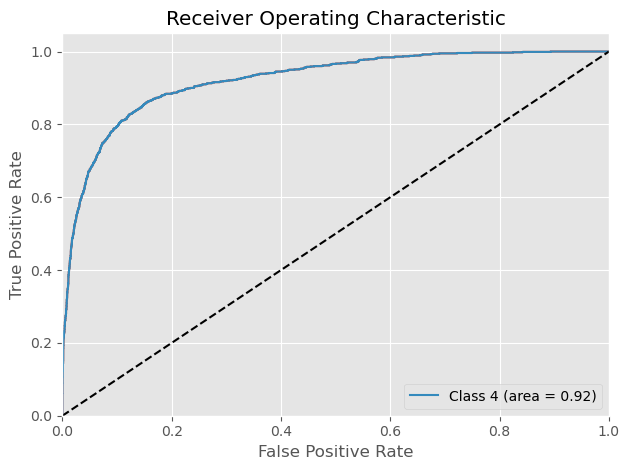

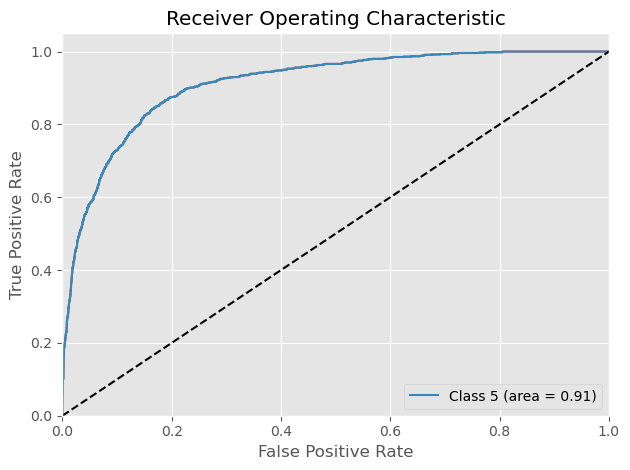

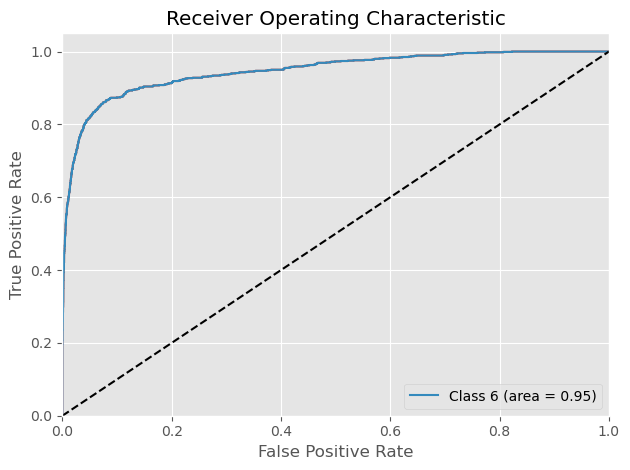

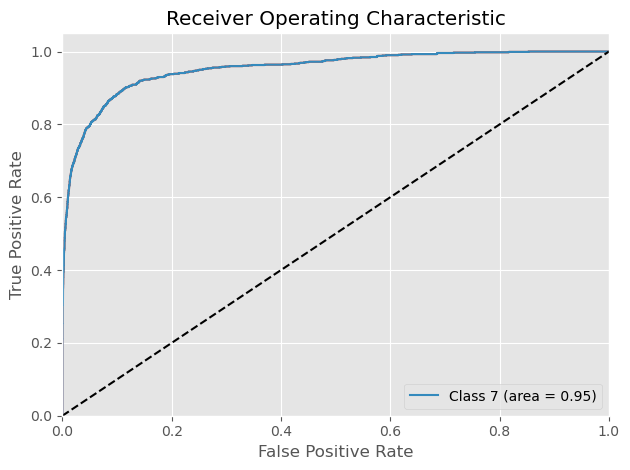

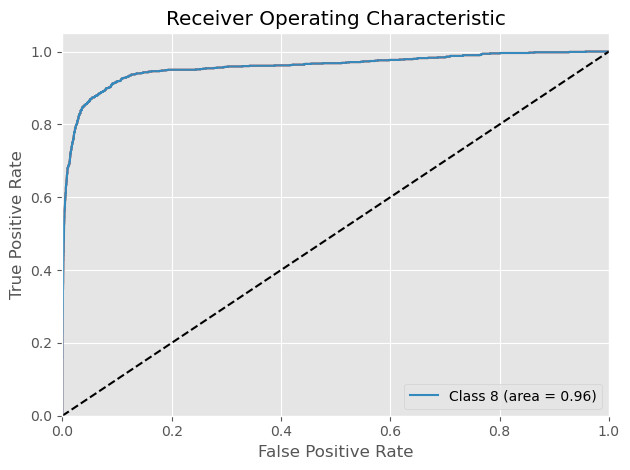

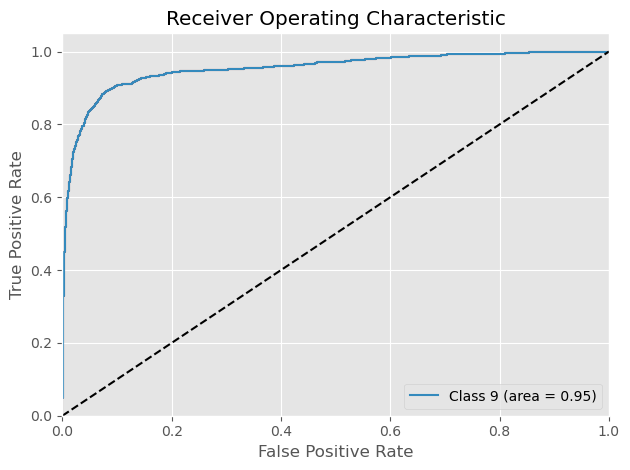

In [42]:
y_pred_proba = tf.nn.softmax(model_1.predict(x_test)).numpy()
plot_roc_curve(y_test, y_pred_proba, classes=range(10))

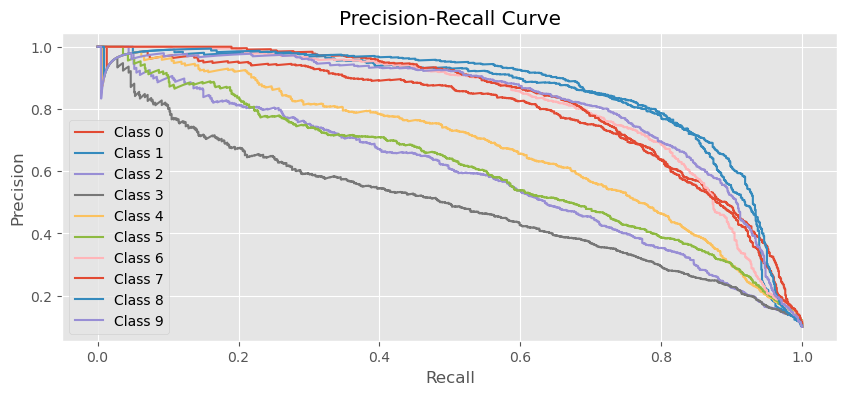

In [43]:
plot_precision_recall_curve(y_test, y_pred_proba, classes=range(10))

### Another architecture for CNN model

In [44]:
# Building the model
model_2 = Sequential()
model_2.add(Conv2D(filters=64, kernel_size=(3, 3), activation="sigmoid", input_shape=(32, 32, 3)))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.2)) 
model_2.add(Conv2D(filters=128, kernel_size=(3, 3), activation="sigmoid"))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.2)) 
model_2.add(Flatten())
model_2.add(Dense(units=64, activation="sigmoid"))
model_2.add(Dense(units=10, activation="softmax"))

In [50]:
# Compile the model
model_2.compile(optimizer=RMSprop(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [51]:
# Train the model
history_2 = model_2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=2)

Epoch 1/10
1563/1563 - 50s - loss: 2.1244 - accuracy: 0.2089 - val_loss: 1.8803 - val_accuracy: 0.3203
Epoch 2/10
1563/1563 - 49s - loss: 1.7794 - accuracy: 0.3643 - val_loss: 1.6535 - val_accuracy: 0.4040
Epoch 3/10
1563/1563 - 49s - loss: 1.6256 - accuracy: 0.4161 - val_loss: 1.5596 - val_accuracy: 0.4429
Epoch 4/10
1563/1563 - 49s - loss: 1.5133 - accuracy: 0.4561 - val_loss: 1.4480 - val_accuracy: 0.4777
Epoch 5/10
1563/1563 - 52s - loss: 1.4399 - accuracy: 0.4861 - val_loss: 1.4472 - val_accuracy: 0.4848
Epoch 6/10
1563/1563 - 53s - loss: 1.3812 - accuracy: 0.5089 - val_loss: 1.3406 - val_accuracy: 0.5182
Epoch 7/10
1563/1563 - 53s - loss: 1.3301 - accuracy: 0.5271 - val_loss: 1.3410 - val_accuracy: 0.5185
Epoch 8/10
1563/1563 - 52s - loss: 1.2896 - accuracy: 0.5399 - val_loss: 1.2648 - val_accuracy: 0.5442
Epoch 9/10
1563/1563 - 53s - loss: 1.2499 - accuracy: 0.5587 - val_loss: 1.2450 - val_accuracy: 0.5522
Epoch 10/10
1563/1563 - 53s - loss: 1.2142 - accuracy: 0.5686 - val_loss:

In [58]:
# Evaluate the model
test_loss, test_acc = model_2.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100: .2f}%")

# predict on the test set
y_pred = np.argmax(model_2.predict(x_test), axis=1)

# Calculate other metrics
precision = precision_score(y_test, y_pred, average='macro',zero_division=0.0)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1_Score: {f1 * 100:.2f}%")

313/313 - 3s - loss: 1.2189 - accuracy: 0.5600
Test Accuracy:  56.00%
Precision: 56.23%
Recall: 56.00%
F1_Score: 55.55%


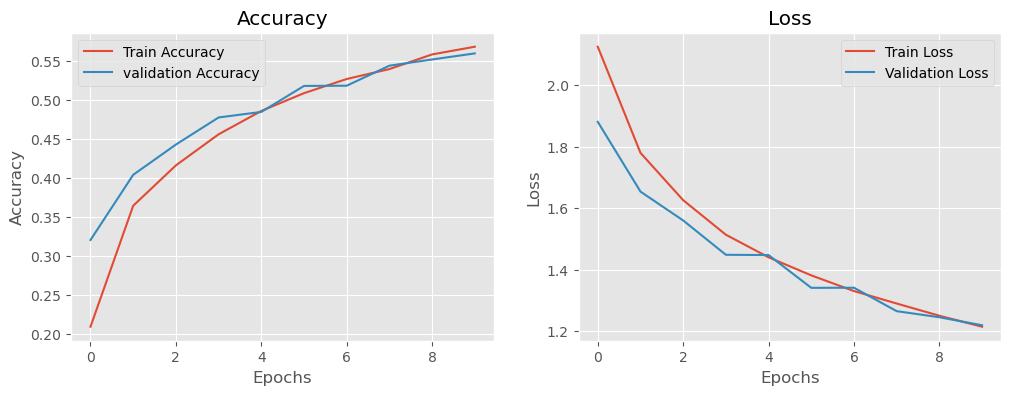

In [59]:
plot_accuracy_and_loss(history_2)

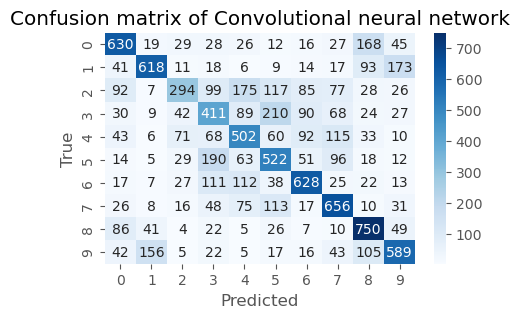

In [60]:
plot_confusion_matrix(y_test, y_pred, "Confusion matrix of Convolutional neural network 2")

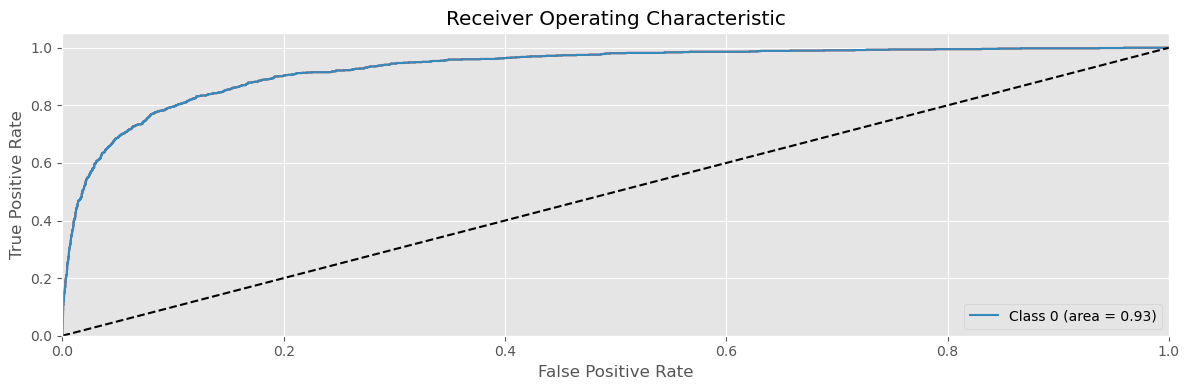

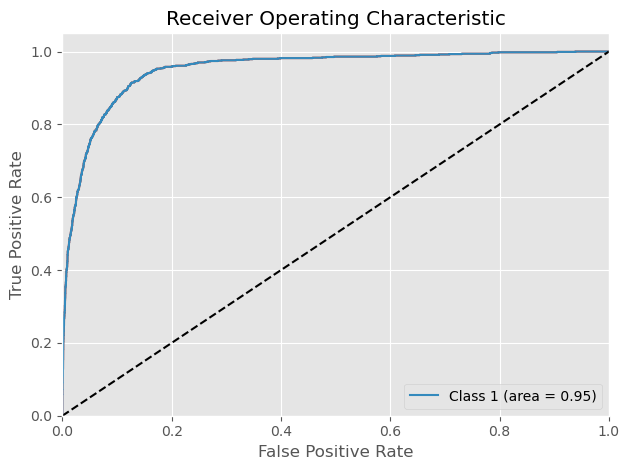

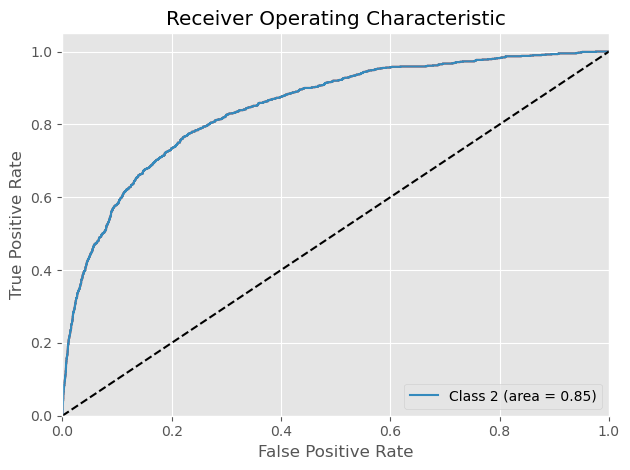

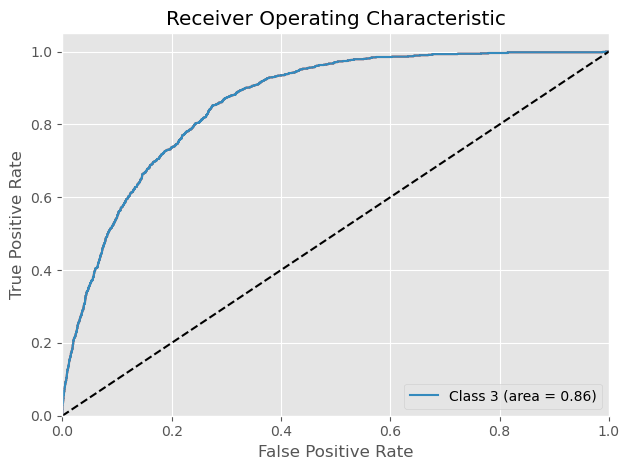

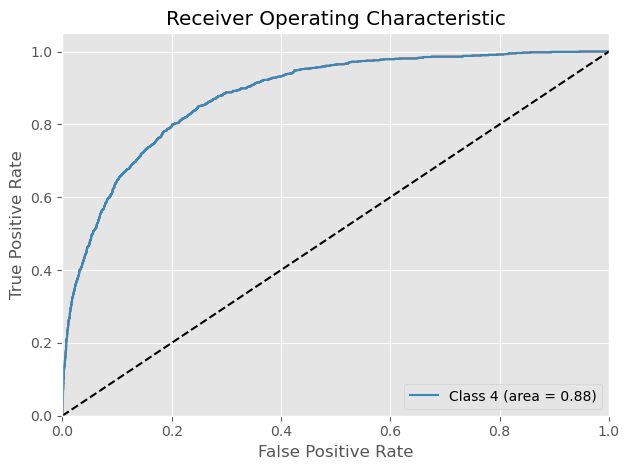

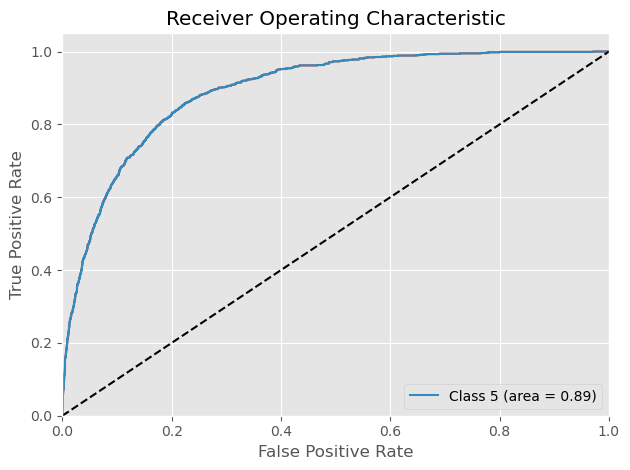

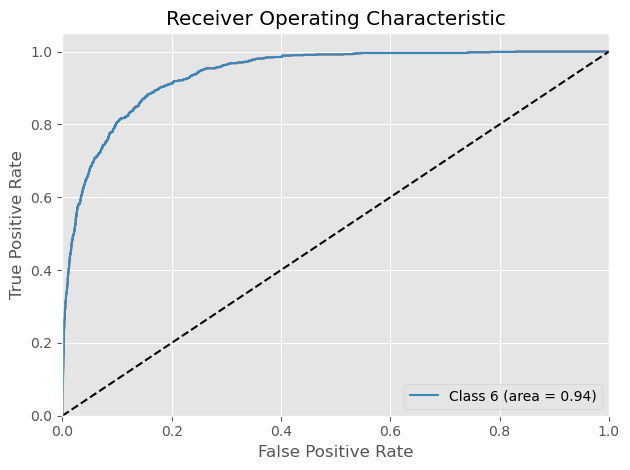

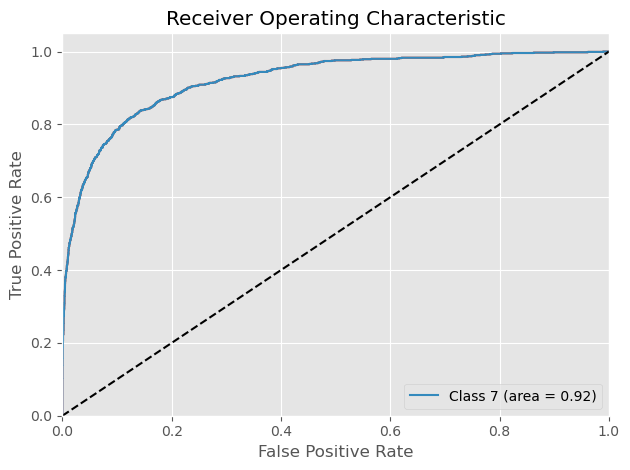

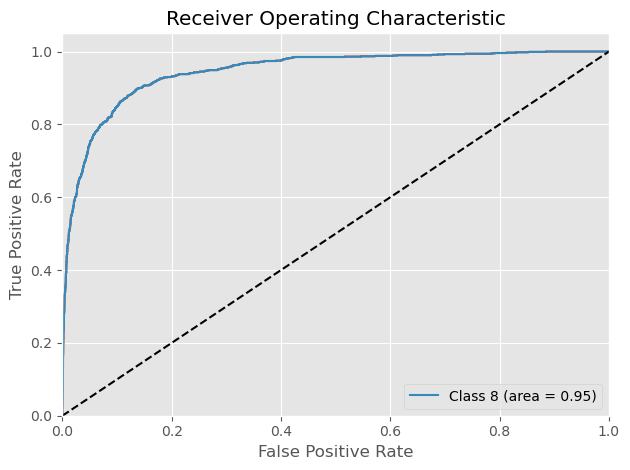

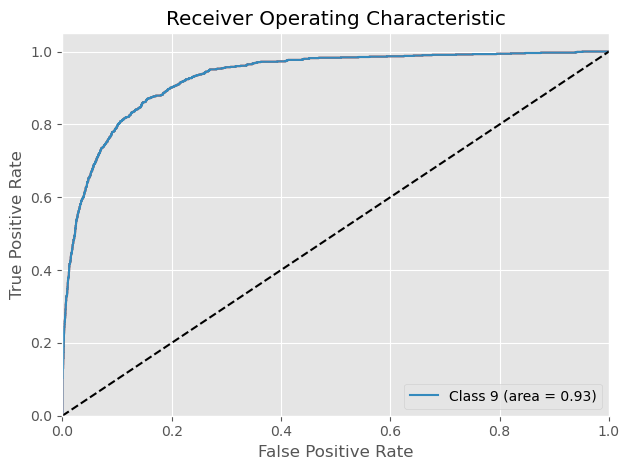

In [62]:
y_pred_proba = tf.nn.softmax(model_2.predict(x_test)).numpy()
plot_roc_curve(y_test, y_pred_proba, classes=range(10))

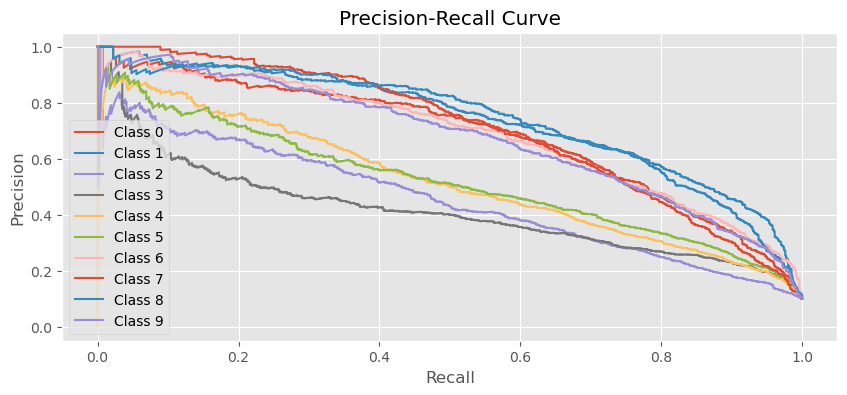

In [63]:
plot_precision_recall_curve(y_test, y_pred_proba, classes=range(10))

In [64]:
# Building the model
model_3 = Sequential()
model_3.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)))
model_3.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model_3.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Flatten())
model_3.add(Dense(units=512, activation="relu"))
model_3.add(Dropout(0.5))          
model_3.add(Dense(units=10, activation="softmax"))

In [65]:
# Compile the model
model_3.compile(optimizer=Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [76]:
# Train the model
history_3 = model_3.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), verbose=2)

Epoch 1/20
1563/1563 - 60s - loss: 0.1919 - accuracy: 0.9366 - val_loss: 1.3750 - val_accuracy: 0.7459
Epoch 2/20
1563/1563 - 62s - loss: 0.1890 - accuracy: 0.9367 - val_loss: 1.4798 - val_accuracy: 0.7428
Epoch 3/20
1563/1563 - 63s - loss: 0.1942 - accuracy: 0.9364 - val_loss: 1.4318 - val_accuracy: 0.7383
Epoch 4/20
1563/1563 - 64s - loss: 0.1788 - accuracy: 0.9396 - val_loss: 1.4872 - val_accuracy: 0.7379
Epoch 5/20
1563/1563 - 66s - loss: 0.1874 - accuracy: 0.9391 - val_loss: 1.3972 - val_accuracy: 0.7335
Epoch 6/20
1563/1563 - 64s - loss: 0.1728 - accuracy: 0.9420 - val_loss: 1.5746 - val_accuracy: 0.7222
Epoch 7/20
1563/1563 - 70s - loss: 0.1813 - accuracy: 0.9402 - val_loss: 1.4710 - val_accuracy: 0.7435
Epoch 8/20
1563/1563 - 68s - loss: 0.1777 - accuracy: 0.9416 - val_loss: 1.4473 - val_accuracy: 0.7438
Epoch 9/20
1563/1563 - 66s - loss: 0.1731 - accuracy: 0.9420 - val_loss: 1.5093 - val_accuracy: 0.7443
Epoch 10/20
1563/1563 - 67s - loss: 0.1834 - accuracy: 0.9405 - val_loss:

In [77]:
# Evaluate the model
test_loss, test_acc = model_3.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100: .2f}%")

# predict on the test set
y_pred = np.argmax(model_3.predict(x_test), axis=1)

# Calculate other metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1_Score: {f1 * 100:.2f}%")

313/313 - 3s - loss: 1.7580 - accuracy: 0.7450
Test Accuracy:  74.50%
Confusion Matrix:
[[743  22  59  25  21   9  10  11  71  29]
 [  9 873   5   8   3   6   6   2  27  61]
 [ 55   3 615  74  93  61  45  31  17   6]
 [ 20  10  76 562  63 170  35  40  14  10]
 [ 18   0  59  73 713  39  34  55   5   4]
 [  9   3  54 149  46 683  11  35   4   6]
 [  4   7  47  70  35  24 791   8   8   6]
 [ 12   1  31  45  57  76   4 760   5   9]
 [ 52  20   7  11   8   3   3   2 871  23]
 [ 18  65   5  26   4   2   3   9  29 839]]
Precision: 74.72%
Recall: 74.50%
F1_Score: 74.57%


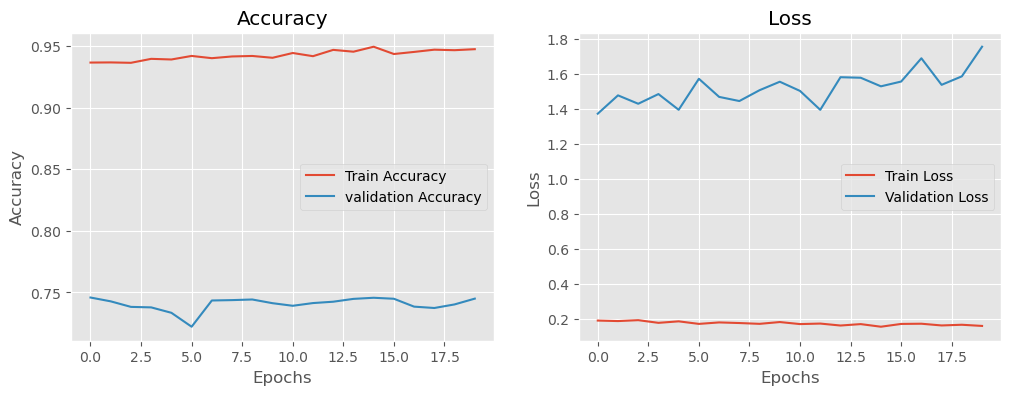

In [78]:
plot_accuracy_and_loss(history_3)

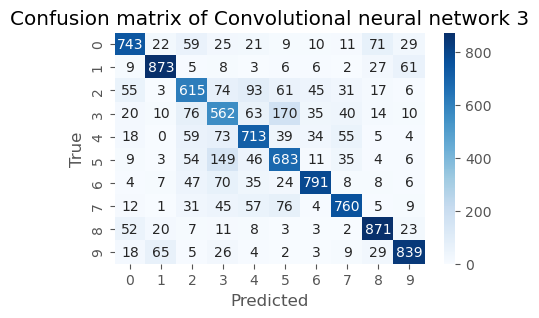

In [79]:
plot_confusion_matrix(y_test, y_pred, "Confusion matrix of Convolutional neural network 3")

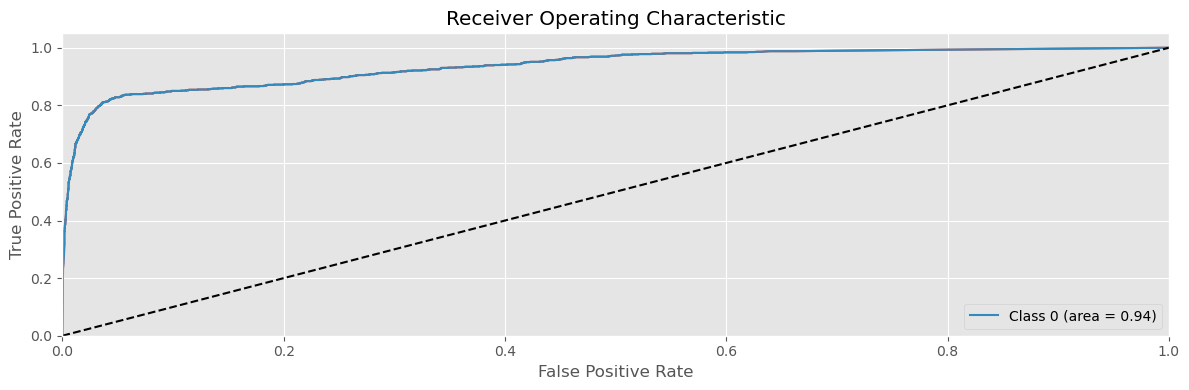

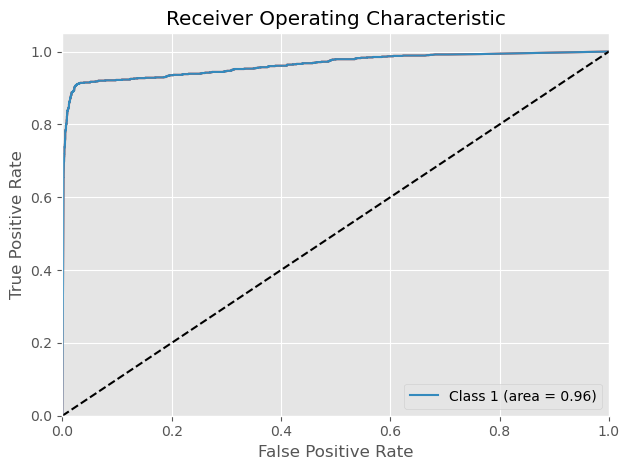

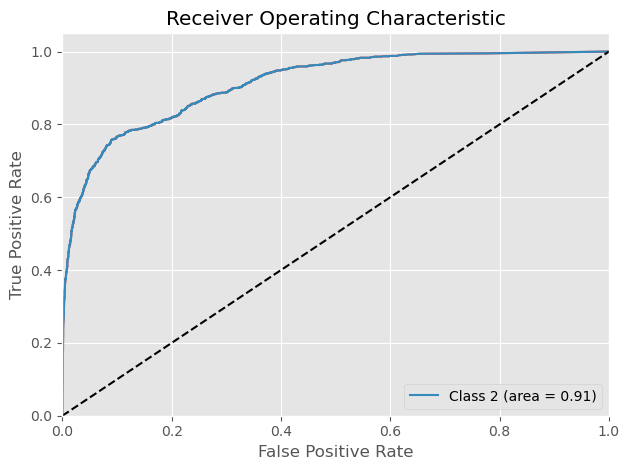

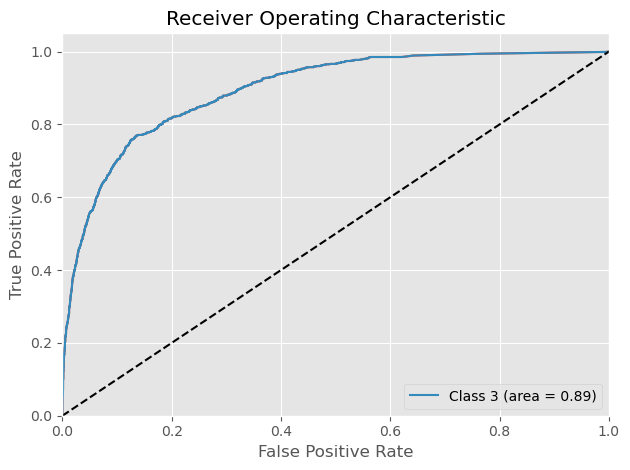

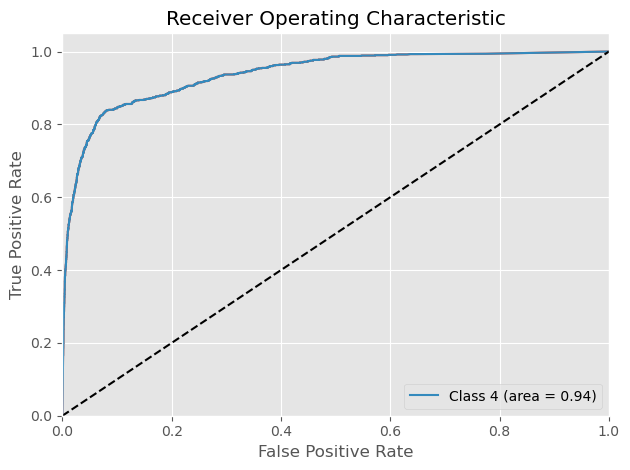

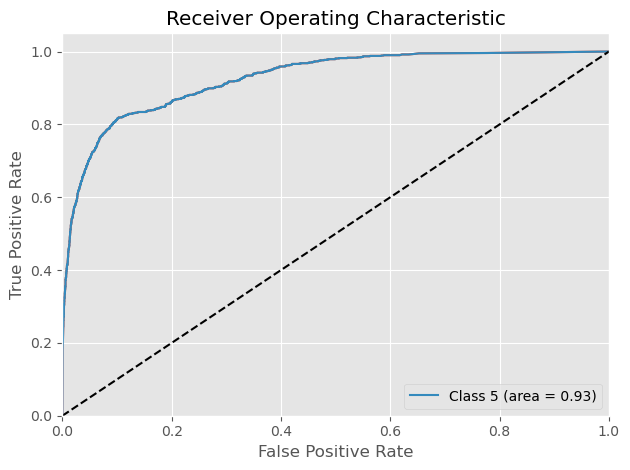

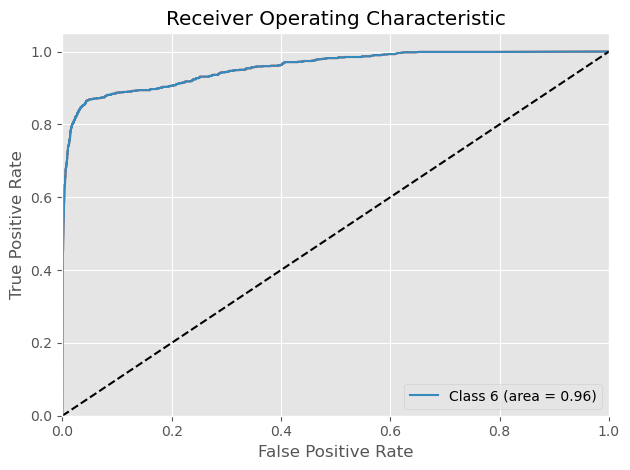

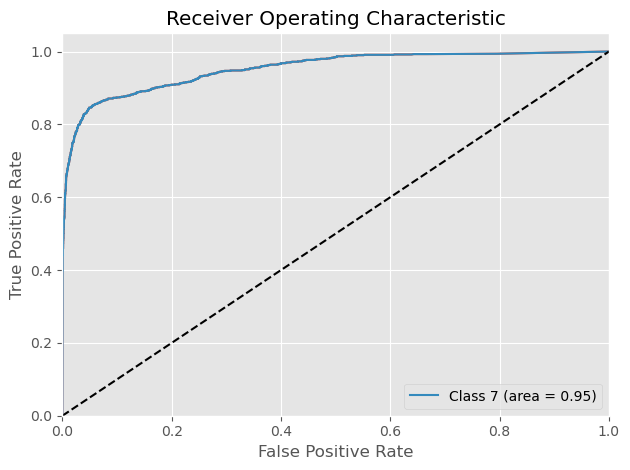

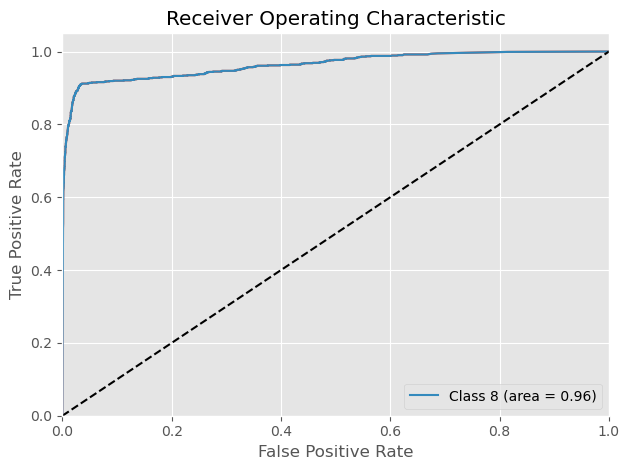

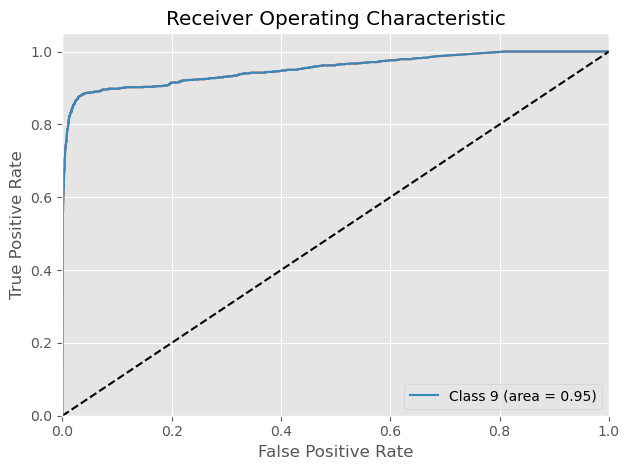

In [81]:
y_pred_proba = tf.nn.softmax(model_3.predict(x_test)).numpy()
plot_roc_curve(y_test, y_pred_proba, classes=range(10))

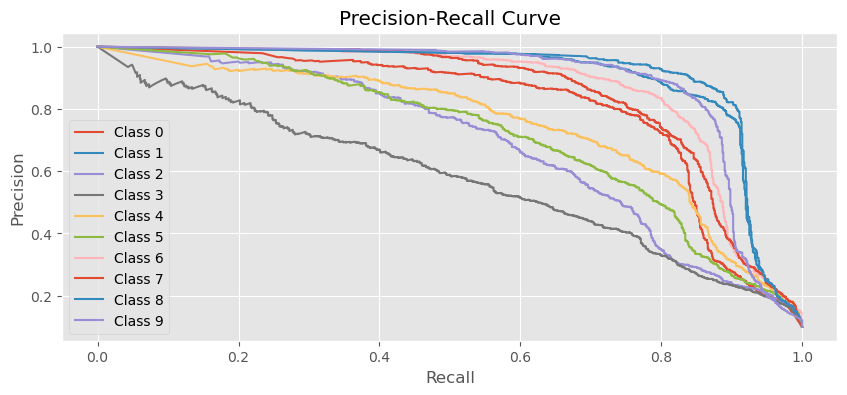

In [82]:
plot_precision_recall_curve(y_test, y_pred_proba, classes=range(10))

#### Make Prediction
##### In the below code we use model 3 to predict the label of unknown test data set

In [103]:
def show_image(x, y, index):
    plt.figure(figsize=(15, 2))
    plt.grid(False)
    plt.imshow(x[index])
    plt.xlabel(classes[int(y[index])])

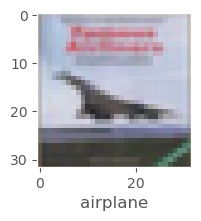

In [104]:
show_image(x_test, y_test, 3)

In [105]:
y_predictions = model_3.predict(x_test)
y_predictions = [np.argmax(arr) for arr in y_predictions]
print(classes[y_predictions[3]])

airplane


### Wide ResNet

In [106]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [107]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [108]:
# Build a Wide ResNet Model

input_shape = (32, 32, 3)
num_classes = 10
base_rn_model = tf.keras.applications.ResNet50(include_top=False, weights=None, input_shape=input_shape, pooling='avg')
x = Flatten()(base_rn_model.output)
x = Dense(num_classes, activation="softmax")(x)
rn_model = tf.keras.models.Model(inputs=base_rn_model.input, outputs=x)

In [109]:
# Compile the model
rn_model.compile(Adam(learning_rate=0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy']
                )

In [110]:
# Train the model
history = rn_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
 201/1563 [==>...........................] - ETA: 12:16 - loss: 2.6523 - accuracy: 0.2307

KeyboardInterrupt: 